# Regularización

Cuando diseñamos un modelo para modelar, nunca mejor dicho, nuestros datos queremos que sea capaz de generalizar los datos, es decir que sea capaz de predecir correctamente datos que no ha visto anteriormente. Cuando nuestro modelo no es capaz de alcanzar esta performance suele ser porque el modelo sufre de **overfitting** o **underfitting** (lo veréis más adelante). Hay muchas variantes por la que un modelo sufre de dichos problemas y hay distintas soluciones para afrontarlo.

<img src="./images/over_underfitting.png" width=70%>

Una de ellas, son los métodos de **Regularización**, que permiten reducir el **error de generalización de los datos** pero no el **error del entrenamiento**. Dentro de los métodos de regularización hay muchos tipos pero nosotros vamos a ver uno de ellos que está estrechamente ligado a las **regresiones lineales**

## Regularización en los mínimos cuadrados

Cuando entrenamos un modelo queremos restringir los parámetros del modelo de tal forma que aprenda a generalizar mejor de los datos, para ello, simplemente añadimos un **término de penalización**:<br><br>

<center>$\DeclareMathOperator*{\argmin}{argmin} w_{LS} = \argmin _w \sum_{i=1}^n (y_{i} - f(x_{i}; w))^2 + \lambda g(w)$</center><br>

Básicamente hemos cogido la función de los **mínimos cuadrados** y le hemos añadido un término de penalización:

$\lambda > 0$: Parámetro de regularización<br>
$g(w) > 0$: Función de penalización

Hay dos funciones muy típicas usadas para $g(w)$ que escucharéis a lo largo de vuestra vida en el campo del Machine Learning:

## Ridge Regression - L2

**Ridge Regression**, tambíen conocida como **regularización L2**, es cuando añadimos una penalización equivalente al cuadrado de los coeficientes $w$.<br><br>

<center>$g(w) = ||w||^2 = \sum_{j=1}^d w_j^2 $</center><br>

Por tanto:

<center>$\DeclareMathOperator*{\argmin}{argmin} w_{LS} = \argmin _w \sum_{i=1}^n (y_{i} - f(x_{i}; w))^2 + \lambda \sum_{j=1}^d w_j^2$</center><br>

Así que **Ridge Regression** pone una penalización en los coeficientes $w$. El término $\lambda$ regulariza los coeficientes de tal manera que si los coeficientes toman grandes valores, la función de optimización se penaliza. 

<div class="alert alert-block alert-danger">
    <b>Si $\lambda \rightarrow 0$ Se asemeja a la regresión lineal.</b><br>
    <b>Si $\lambda \rightarrow \infty : \overrightarrow{0}$ Algo pequeño sumado a $\infty$ es prácticamente $\infty$</b>
</div>

<div class="alert alert-success">
    <b>Influencia del parámetro $\alpha$ en Ridge Regression</b>
</div> 

In [4]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

Generamos datos aleatorios usando `numpy`

In [5]:
np.random.seed(42)
# Número de datos
m = 20
X = 3 * np.random.rand(m, 1)
# Creamos y añadiendole un poco de aleatoriedad
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

# Puntos para la prediccion
X_test = np.linspace(0, 3, 100).reshape(100, 1)

Iteramos sobre los valores de `alpha` que queremos analizar

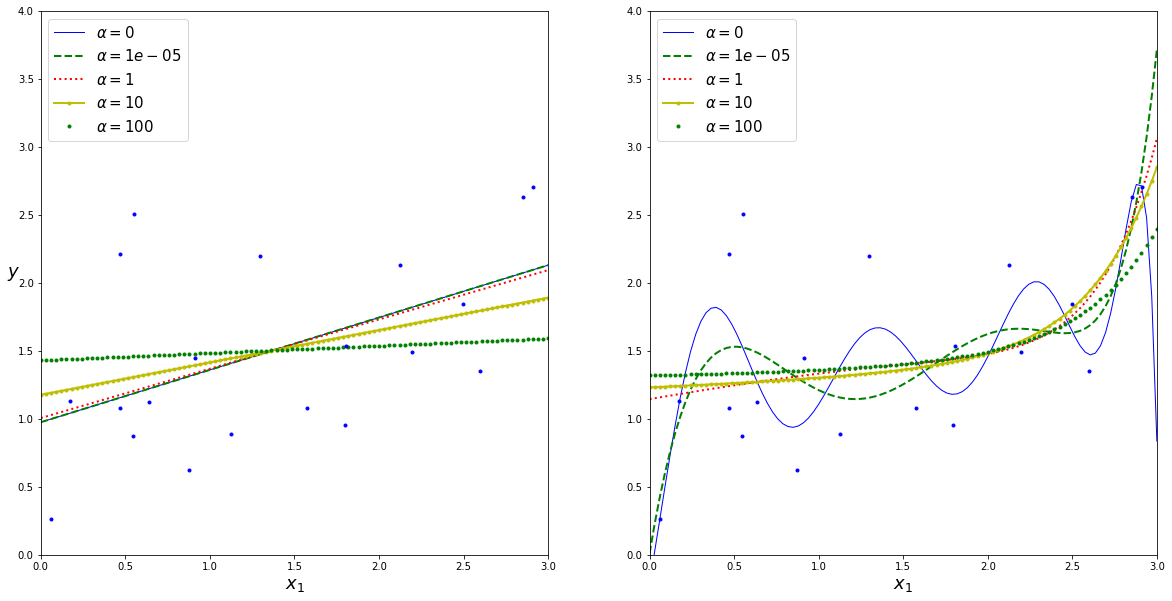

In [6]:
def plot_model(model_class, polynomial, alphas):
    # Iteramos sobre los valores de alpha y actualizamos el modelo
    for alpha, style in zip(alphas, ("b-", "g--", "r:", "y.-", "g.")):
        model = model_class(alpha, random_state=42) if alpha > 0 else LinearRegression()
        # Si es polinomial
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model)])
            
        model.fit(X, y)
        # Prediction en los puntos de X_test
        y_test_regul = model.predict(X_test)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_test, y_test_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    
    # Graficamos los datos que hemos usado para entrenar
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure()
plt.subplot(121)

alphas = (0, 10**-5, 1, 10, 100)
# Entrenamos y calculamos LinearRegression
plot_model(Ridge, polynomial=False, alphas=alphas)

# Añadimos el nombre al axis y
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)

# Entrenamos y calculamos Polinomial
plot_model(Ridge, polynomial=True, alphas=alphas)
plt.show()

Al incrementar `alpha` las predicciones se aplanan

## Lasso Regression - L1

**Lasso Regression**, tambíen conocida como **regularización L1**, viene definida por:<br><br>

<center>$g(w) = ||w||^2 = \sum_{j=1}^d |w_j| $</center><br>

Por tanto:

<center>$\DeclareMathOperator*{\argmin}{argmin} w_{LS} = \argmin _w \sum_{i=1}^n (y_{i} - f(x_{i}; w))^2 + \lambda \sum_{j=1}^d |w_j| $</center><br>

**Nota:** $|w| \rightarrow$ valor absoluto.

<div class="alert alert-block alert-danger">
    <b>Si $\lambda \rightarrow 0$ Se asemeja a la regresión lineal.</b><br>
    <b>Si $\lambda \rightarrow \infty : \overrightarrow{0}$ Algo pequeño sumado a $\infty$ es prácticamente $\infty$</b>
</div>

In [7]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

Generamos datos usando `numpy`

In [8]:
np.random.seed(42)
# Número de datos
m = 20
X = 3 * np.random.rand(m, 1)
# Creamos y añadiendole un poco de aleatoriedad
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

# Puntos para la prediccion
X_test = np.linspace(0, 3, 100).reshape(100, 1)

Iteramos sobre los valores de `alpha`

c:\users\aleja\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.763952653967135, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


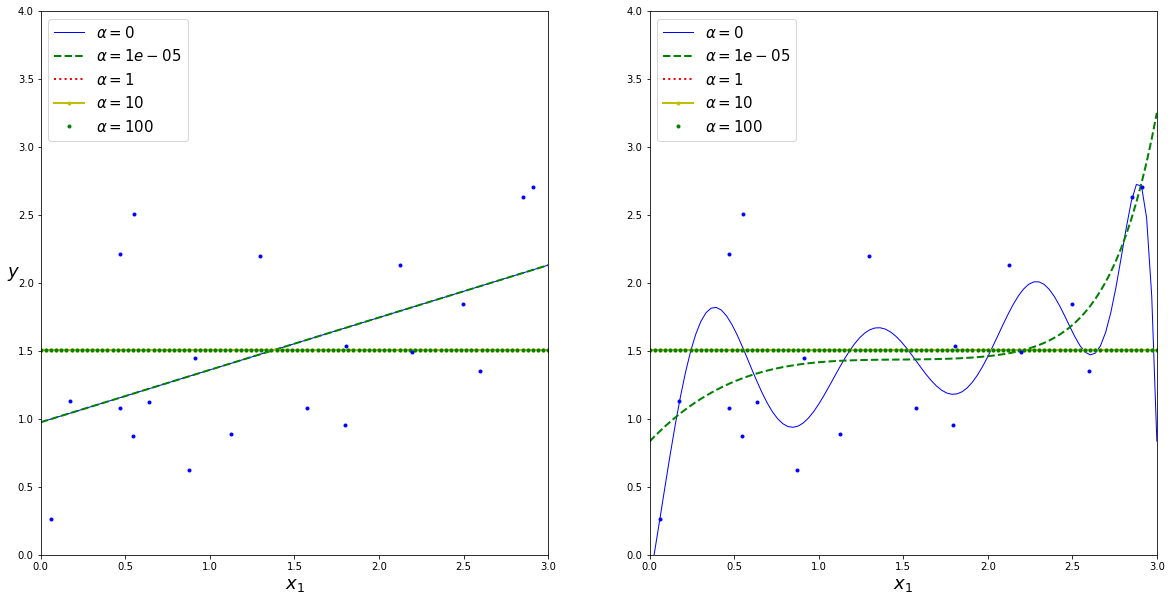

In [9]:
def plot_model(model_class, polynomial, alphas):
    # Iteramos sobre los valores de alpha y actualizamos el modelo
    for alpha, style in zip(alphas, ("b-", "g--", "r:", "y.-", "g.")):
        model = model_class(alpha, random_state=42) if alpha > 0 else LinearRegression()
        # Si es polinomial
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model)])
            
        model.fit(X, y)
        # Prediction en los puntos de X_test
        y_test_regul = model.predict(X_test)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_test, y_test_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    
    # Graficamos los datos que hemos usado para entrenar
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure()
plt.subplot(121)

alphas = (0, 10**-5, 1, 10, 100)
# Entrenamos y calculamos LinearRegression
plot_model(Lasso, polynomial=False, alphas=alphas)

# Añadimos el nombre al axis y
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)

# Entrenamos y calculamos Polinomial
plot_model(Lasso, polynomial=True, alphas=alphas)
plt.show()